In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
confirmed_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Промежуточная аттестация/time_series_covid19_confirmed_global.csv')

In [ ]:
# Убираем неиспользуемые столбцы (долгота, широта, провинция/штат, набор дат позже 365 дней)
confirmed_res = confirmed_raw.drop(columns=confirmed_raw.iloc[:, 2:624])
confirmed_ress = confirmed_res.drop(columns='Province/State')

In [ ]:
print(confirmed_ress.columns)

Index(['Country/Region', '10/3/21', '10/4/21', '10/5/21', '10/6/21', '10/7/21',
       '10/8/21', '10/9/21', '10/10/21', '10/11/21',
       ...
       '9/23/22', '9/24/22', '9/25/22', '9/26/22', '9/27/22', '9/28/22',
       '9/29/22', '9/30/22', '10/1/22', '10/2/22'],
      dtype='object', length=366)


In [ ]:
# Группируем данные по странам, и транспонируем таблицу
confirmed_gr = confirmed_ress.groupby("Country/Region").aggregate(np.sum)

In [ ]:
confirmed_gr.head(2)

,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,...,9/23/22,9/24/22,9/25/22,9/26/22,9/27/22,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,...,198163,198244,198416,198543,198750,198876,199067,199188,199310,199386
Albania,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,...,331908,331953,331976,331987,332066,332129,332173,332221,332263,332285


In [ ]:
confirmed_t = confirmed_gr.T
confirmed_t.index.name = "Date"
confirmed_t = confirmed_t.reset_index()

In [ ]:
confirmed_t.head()

Country/Region,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,10/3/21,155191,171794,203789,15222,58943,0,3503,5259738,264690,...,389185,175267,4,373332,808578,406652,0,9139,209163,131129
1,10/4/21,155287,171794,203915,15267,58943,0,3503,5260719,265317,...,389260,175715,4,373332,813961,408211,0,9214,209172,131129
2,10/5/21,155309,172618,204046,15271,59895,0,3518,5261935,266208,...,389363,176019,4,376311,818324,409489,0,9234,209199,131205
3,10/6/21,155380,173190,204171,15284,60448,0,3581,5263219,267363,...,389505,176477,4,377833,822687,439845,0,9271,209248,131434
4,10/7/21,155429,173723,204276,15288,60803,0,3663,5264305,268672,...,389661,176964,4,379352,826837,440936,0,9299,209283,131523


In [ ]:
x = confirmed_t[['Date', 'Russia']]

In [ ]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:365])
# Make time series shorter
X_train = TimeSeriesResampler(sz=365).fit_transform(X_train)
sz = X_train.shape[1]

Euclidean k-means
50.340 --> 37.475 --> 37.207 --> 37.207 --> 


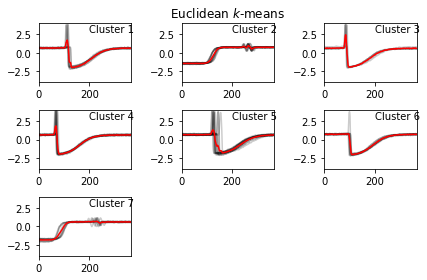

In [ ]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=7, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(7):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.tight_layout()
plt.show()

DBA k-means
Init 1


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.462 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    0.8s finished


0.330 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    0.7s finished


0.326 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    0.7s finished


0.326 --> 
Init 2


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  69 out of  69 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 207 out of 207 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

0.628 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    0.7s finished


0.324 --> 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    0.7s finished


0.324 --> 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 483 out of 483 | elapsed:    0.7s finished
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


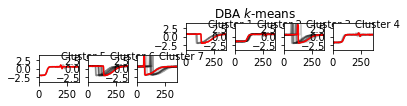

In [ ]:
# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=7,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(7):
    plt.subplot(7, 7, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")
plt.tight_layout()
plt.show()

In [ ]:
# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=7,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(7):
    plt.subplot(7, 7, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

Soft-DTW k-means
18.094 --> 22.734 --> 23.019 --> 23.143 --> 23.729 --> 23.891 --> 23.899 --> 23.900 --> 23.904 --> 23.907 --> 23.909 --> 23.914 --> 23.915 --> 23.920 --> 23.922 --> 23.924 --> 23.926 --> 23.928 --> 23.931 --> 23.932 --> 23.934 --> 23.934 --> 23.936 --> 23.937 --> 23.938 --> 23.940 --> 23.944 --> 23.947 --> 23.952 --> 

KeyboardInterrupt: ignored

In [ ]:
confirmed_srez = confirmed_t[2:203]

Euclidean k-means for Date
4.302 --> 3.362 --> 3.110 --> 3.110 --> 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


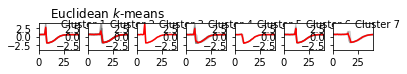

Euclidean k-means for Afghanistan
4.302 --> 3.362 --> 3.110 --> 3.110 --> 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


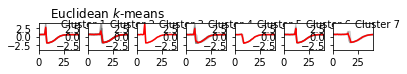

Euclidean k-means for Albania
4.302 --> 3.362 --> 3.110 --> 3.110 --> 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


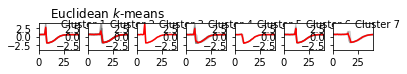

Euclidean k-means for Algeria
4.302 --> 3.362 --> 3.110 --> 3.110 --> 


KeyboardInterrupt: ignored

<Figure size 432x288 with 0 Axes>

In [ ]:
# По всем странам
for columnname in confirmed_srez:
  x = confirmed_t[['Date', columnname]]
  seed = 0
  np.random.seed(seed)
  X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
  X_train = X_train[y_train < 2]  # Keep first 3 classes
  np.random.shuffle(X_train)
# Keep only 50 time series
  X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
  X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
  sz = X_train.shape[1]

  print("Euclidean k-means for", columnname)
  km = TimeSeriesKMeans(n_clusters=7, verbose=True, random_state=seed)
  y_pred = km.fit_predict(X_train)

  plt.figure()
  for yi in range(7):
      plt.subplot(3, 3, yi + 1)
      for xx in X_train[y_pred == yi]:
          plt.plot(xx.ravel(), "k-", alpha=.2)
      plt.plot(km.cluster_centers_[yi].ravel(), "r-")
      plt.xlim(0, sz)
      plt.ylim(-4, 4)
      plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
              transform=plt.gca().transAxes)
      if yi == 1:
          plt.title("Euclidean $k$-means")
  plt.tight_layout()
  plt.show()

### TEST

In [ ]:
print(confirmed_ress.columns)

Index(['Country/Region', '10/3/21', '10/4/21', '10/5/21', '10/6/21', '10/7/21',
       '10/8/21', '10/9/21', '10/10/21', '10/11/21',
       ...
       '9/23/22', '9/24/22', '9/25/22', '9/26/22', '9/27/22', '9/28/22',
       '9/29/22', '9/30/22', '10/1/22', '10/2/22'],
      dtype='object', length=366)


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
lb.fit(confirmed_ress['Country/Region'])
reg = lb.transform(confirmed_ress['Country/Region'])
confirmed_ress['Country/Region'] = reg
confirmed_ress.head(2)

,Country/Region,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,...,9/23/22,9/24/22,9/25/22,9/26/22,9/27/22,9/28/22,9/29/22,9/30/22,10/1/22,10/2/22
0,0,155191,155287,155309,155380,155429,155448,155466,155508,155540,...,198163,198244,198416,198543,198750,198876,199067,199188,199310,199386
1,1,171794,171794,172618,173190,173723,174168,174643,174968,175163,...,331908,331953,331976,331987,332066,332129,332173,332221,332263,332285


In [ ]:
x = confirmed_ress[['10/2/22', 'Country/Region']]
seed = 0
np.random.seed(seed)
X_train, y_train, X_test, y_test = CachedDatasets().load_dataset("Trace")
X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train[:50])
# Make time series shorter
X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

Euclidean k-means
10.128 --> 5.610 --> 4.857 --> 4.720 --> 4.720 --> 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations


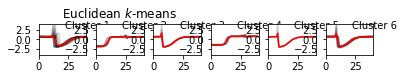

In [ ]:
# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(6):
    plt.subplot(6, 6, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")
plt.tight_layout()
plt.show()

###Метод локтя

2


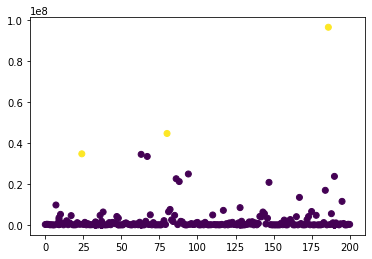

3


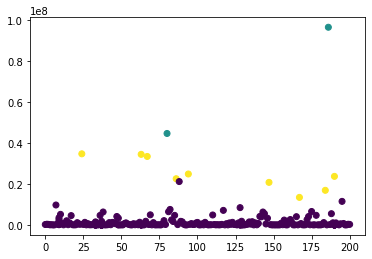

4


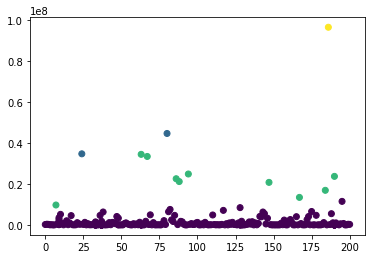

5


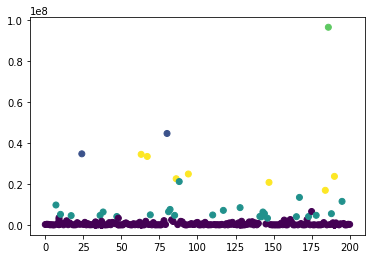

6


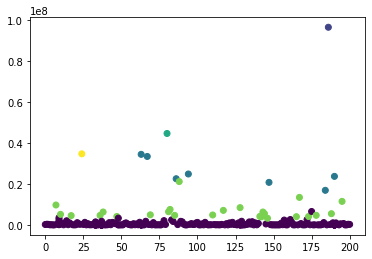

7


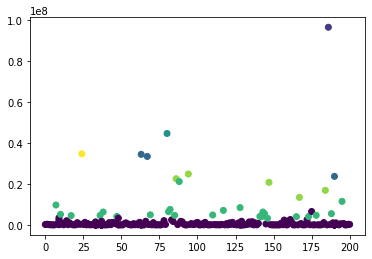

8


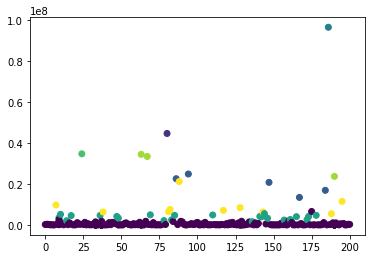

9


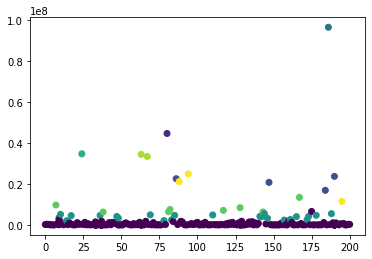

10


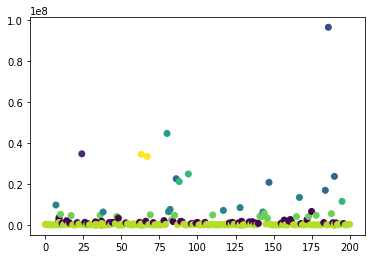

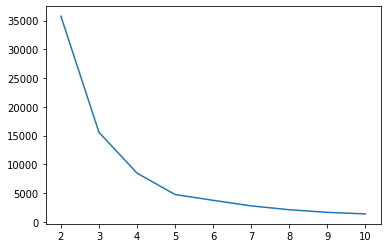

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledDF = sc.fit_transform(confirmed_ress)
wcss = []
for i in range(2, 11):
  kmean = KMeans(n_clusters=i)
  kmean.fit(scaledDF)
  print(i)
  plt.scatter(confirmed_ress['Country/Region'], confirmed_ress['10/2/22'], c=kmean.labels_)
  plt.show()
  wcss.append(kmean.inertia_)
plt.plot(range(2,11), wcss)
plt.show()

Дедрограмма

In [ ]:
import scipy.cluster.hierarchy as sch

In [ ]:
confirmed_year = confirmed_gr[1:]

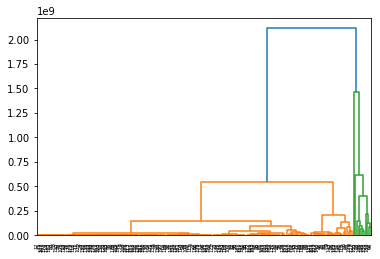

In [ ]:
ytdist = np.array(confirmed_year)
Z = sch.linkage(ytdist, 'ward')
plt.figure()
dn = sch.dendrogram(Z)

### ЛОкоть таймсериес

In [ ]:
X = confirmed_ress['10/2/22'].values
y = confirmed_ress['Country/Region'].values

In [ ]:

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

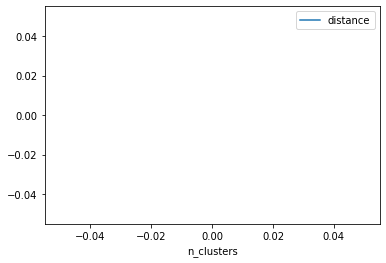

In [ ]:
elbow_data = []
for n_clusters in range (10,500,5):
    train_ts = X.reshape(-1, 289)
    test_ts = train_ts

    X_train = train_ts[:73] # using only first 1.000 as a sample

    km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=False, random_state=42,n_jobs=-1)
    y_pred = km.fit_predict(X_train)
    elbow_data.append((n_clusters, km.inertia_))

pd.DataFrame(elbow_data,columns=['n_clusters', 'distance']).plot(x='n_clusters',y='distance')